<div style="width: 100%; clear: both;">
    <div style="float: left; width: 50%;">
        <img src="../figs/uoc_masterbrand_3linies_positiu.png", align="left">
    </div>
    <div style="float: right; width: 50%;">
        <p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Models avançats de mineria de dades</p>
        <p style="margin: 0; text-align:right;">Màster universitari en Ciència de dades (<i>Data science</i>)</p>
        <p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
    </div>
</div>
<div style="width:100%;">&nbsp;</div>

# Exemple d'agrupament jeràrquic senzill

L’objectiu d’aquest exemple senzill és entendre el funcionament de l’agrupament jeràrquic.


### Càrrega de les llibreries

In [1]:
import numpy as np

Tenim una col·lecció de punts que representem com un array de `numpy`. 

In [2]:
LM_points = np.array(
    [
        [2, 2],
        [2, 4],
        [4, 4],
        [6, 6],
        [7, 8],
        [2, 9],
        [8, 5],
        [7, 2],
        [8, 7],
        [5, 1],
    ]
)

Ara visualitzarem aquests punts. 

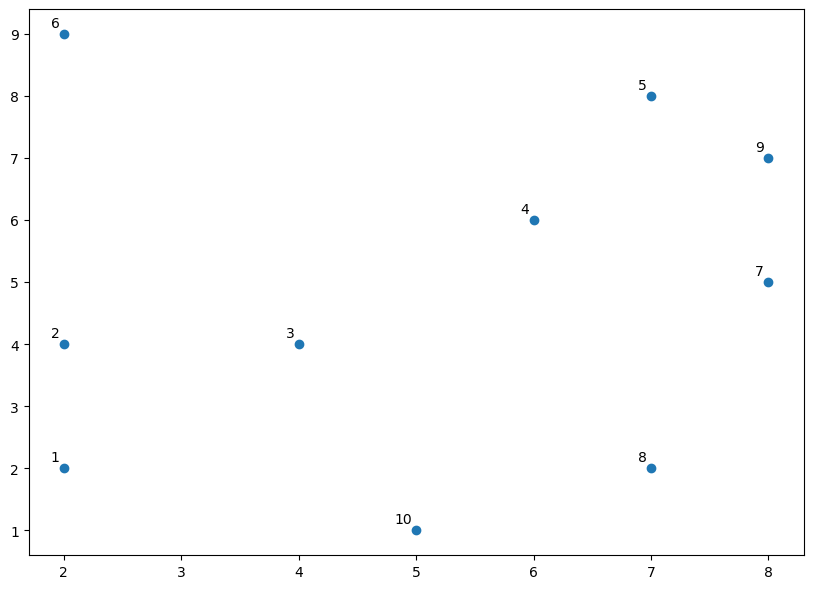

In [3]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(LM_points[:, 0], LM_points[:, 1], label="True Position")

for label, x, y in zip(labels, LM_points[:, 0], LM_points[:, 1]):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-3, 3),
        textcoords="offset points",
        ha="right",
        va="bottom",
    )
plt.show()

Aquests són els punts representats: 
- Punt 1 o A: [2,2]
- Punt 2 o B: [2,4]
- Punt 3 o C: [4,4]
- Punt 4 o D: [6,6]
- Punt 5 o E: [7,8]
- Punt 6 o F: [2,9]
- Punt 7 o G: [8,5]
- Punt 8 o H: [7,2]
- Punt 9 o I: [8,7]
- Punt 10 o J: [5,1]

En aquest gràfic encara no veiem gaire bé quins possibles clústers es podrien formar. Per això crearem el dendograma que correspon a aquests punts, emprant la llibreria `scipy`. 

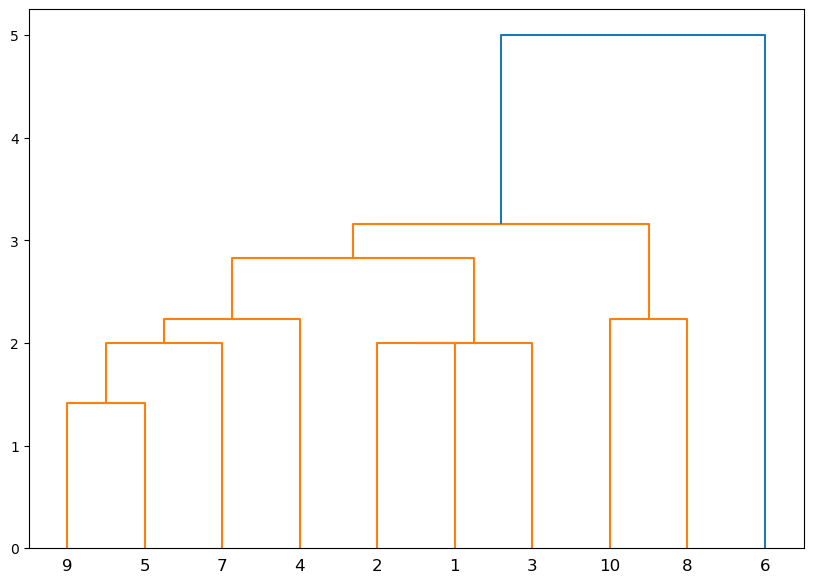

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(LM_points, "single")

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(
    linked,
    orientation="top",
    labels=labelList,
    distance_sort="descending",
    show_leaf_counts=True,
)
plt.show()

L'algorisme comença trobant els dos punts que estan més a prop l'un de l'altre, en aquest cas d'acord amb la distància euclidiana. Com veiem al primer gràfic, els punts més propers són el 5 i el 9, en aquest cas l'I i l'E. El primer clúster seria, per tant, l'IE. D'aquesta manera, basant-nos en el dendograma, veuríem que en la següent iteració de l'algorisme es creen dos clústers. Al clúster IE se li uniria el punt 7, és a dir el punt G, de manera que tindríem a la segona iteració el clúster IEG i, d'altra banda, el clúster 3,1,2, és a dir, el clúster CBA. Així, aniríem pujant pel dendograma. 

Al final tindríem dos clústers (un format per tots els punts menys el 6) i un altre format per un sol punt, el 6. 